In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd

# Place to query
center_point = (37.335796, -121.885254)

# Radius in meters
dist = 2000

# Tags to query by
element_tags = {
    'amenity': ['fuel'], # Gas-stations
    'building': ['retail', 'residential'], # Paracel target locations
    'highway': ['stop', 'traffic_signals'] # Stopsigns and stoplights 
}

# Creates generator for each tag {key: [values]}
queries = [{key: value} for key, value in element_tags.items()]

# Collects elements via each tag key individually to avoid timeout due to large requests
elements = [ox.geometries.geometries_from_point(center_point=center_point, tags=query, dist=dist)
            for query in queries]

gasstations, buildings, traffic_signals = [elem_type for elem_type in elements]
elements_df = elements[0].append(elements[1:])

C:\Users\12162\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\12162\AppData\Local\Temp/ipykernel_15016/4016424094.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  elements_df = elements[0].append(elements[1:])


In [6]:
pip install osmnx==1.1.2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\12162\anaconda3\python.exe -m pip install --upgrade pip' command.
C:\Users\12162\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\12162\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\12162\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [7]:
pip install NetworkX==2.6.3

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\12162\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install GeoPandas==0.10.2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\12162\anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
# Collects road network
G = ox.graph_from_point(center_point, dist=dist, network_type='drive_service')

# Converts network graph to geodataframe
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

Elements within each tag:
    amenity: 15
    building: 145
    highway: 584


Text(0.5, 1.0, 'Stopsigns and Stoplights')

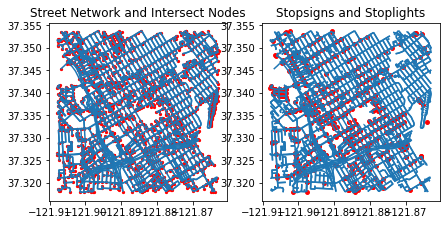

In [10]:
import matplotlib.pyplot as plt

print('Elements within each tag:')
for tag, geodata in zip(element_tags.keys(), elements):
    print(f'    {tag}: {len(geodata)}')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,7))

# Plot street network
edges.plot(ax=ax[0])
edges.plot(ax=ax[1])

# Plot street intersects
nodes.plot(markersize=5, ax=ax[0], color='red')
# Plot stopsigns and stoplights
traffic_signals.plot(markersize=15, ax=ax[1], color='red')

# Assign titles
ax[0].set_title("Street Network and Intersect Nodes")
ax[1].set_title("Stopsigns and Stoplights")

In [11]:
# Get the x coordinates of the nodes
nodes['x'] = nodes["x"].astype(float)

# Get the Convex Hull of the network
convex_hull = edges.unary_union.convex_hull # Hull of network
centroid = convex_hull.centroid # Centroid of corvex hull
orig_xy = (centroid.y, centroid.x) # Get origin x and y coordinates

# Retrieve the most eastern node
maxx = nodes['x'].max() # Highest 'x' value (coordinate)
target = nodes.loc[nodes['x']==maxx, 'geometry'].values[0] # Returns geometry of node with max-x coord
target_xy = (target.y, target.x) # Get target x and y coordinates

# Find the node (id) in graph that is closest to origin point
orig_node = ox.get_nearest_node(G, orig_xy, method='euclidean')

# Find the node (id) in graph that is closest to target point
target_node = ox.get_nearest_node(G, target_xy, method='euclidean')

# Calculate the shortest path
route = nx.shortest_path(G=G, source=orig_node, target=target_node, weight='length')

print(f'Origin: {orig_xy}\nTarget: {target_xy}\n')
print(f'Origin Node ID: {orig_node}\nTarget Node ID: {target_node}\n')
print(f'Route: {route}')

Origin: (37.335763968697115, -121.88542625055723)
Target: (37.3493503, -121.8627317)

Origin Node ID: 5681157297
Target Node ID: 1081273289

Route: [5681157297, 3614216318, 5919589742, 3614216320, 3614216323, 4175909250, 3614216324, 3614216325, 5288352290, 4182147571, 281149296, 65551819, 65551821, 4878680389, 4878680387, 65467672, 65519591, 4878680394, 65430055, 65529806, 65460546, 65529810, 65529813, 7138278230, 7138278242, 65487649, 7330427723, 7330427718, 65421976, 8498958005, 7132735077, 7132735056, 65529814, 65494694, 7920340712, 65529815, 65529816, 65529817, 4915174310, 65529824, 8298953255, 8298953252, 1081273302, 1081273289]


C:\Users\12162\anaconda3\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\12162\anaconda3\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


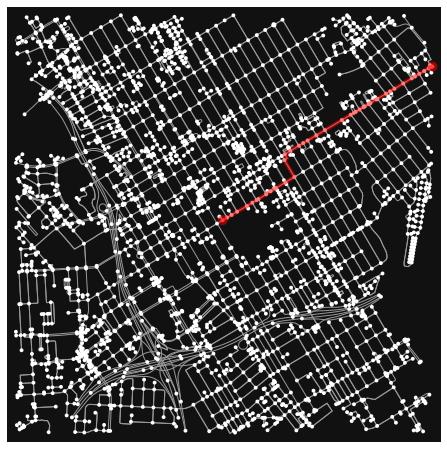

In [5]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(G, route)